# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forecast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

 <h2>Camilo Angarita: 201111642
    <br>
 Carolina Padilla: 201111402 
    <br>
 Jaime Orjuela: 201924252
    <br>
 David Tavera: 201016123
    </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error

Importing plotly failed. Interactive plots will not work.


,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


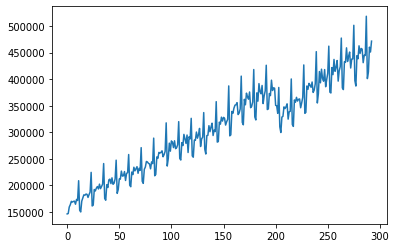

In [2]:
retail = pd.read_csv('../datasets/example_retail_sales.csv')
plt.plot(retail['y'])
retail.head()

,ds,y
1,1992-02-01,0.004791
2,1992-03-01,0.080045
3,1992-04-01,0.026831
4,1992-05-01,0.038352
5,1992-06-01,-0.008296
6,1992-07-01,0.007249
7,1992-08-01,0.002786
8,1992-09-01,-0.034316
9,1992-10-01,0.053449
10,1992-11-01,-0.012213


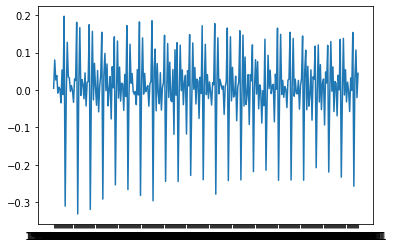

In [3]:
retail_rl=retail.copy()
retail_rl['rlog']=np.log(retail['y']) - np.log(retail['y'].shift(1))
retail_rl['y']=retail_rl['rlog']
retail_rl=retail_rl.drop(['rlog'],axis=1).dropna()
plt.plot(retail_rl['y'])
retail_rl


In [4]:
X = retail.values
size = int(len(X) * 0.9)
train, test = retail[0:size], retail[size:len(X)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  263 l2:  30


In [5]:
for t in range(len(test)):
    model = Prophet()
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    #print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 264


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 265


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 266


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 267


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 268


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 269


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 270


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 271


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 272


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 273


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 274


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 275


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 276


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 277


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 278


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 279


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 281


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 282


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 283


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 284


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 285


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 286


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 287


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 288


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 289


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 290


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 291


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 292
nueva longitud: 293


In [6]:
test.loc[:,'y'].to_list()

[477205,
 383399,
 380315,
 432806,
 431415,
 458822,
 433152,
 443005,
 450913,
 420871,
 437702,
 437910,
 501232,
 397252,
 386935,
 444110,
 438217,
 462615,
 448229,
 457710,
 456340,
 430917,
 444959,
 444507,
 518253,
 400928,
 413554,
 460093,
 450935,
 471421]

In [7]:
predictions

[476442.6554607245,
 396997.4441667319,
 407515.8175356317,
 423323.573077621,
 426042.8307220463,
 443814.3780320802,
 445839.2943281419,
 443398.9670117138,
 451793.11808104475,
 428724.7042979551,
 432485.8827042123,
 441674.83520239673,
 494667.05604589405,
 414936.93480597076,
 428044.02750505926,
 437602.80809778854,
 442578.96816195734,
 461199.1180384311,
 460375.2894977849,
 458797.5518092952,
 467791.88315885747,
 442017.8414726636,
 446466.63814001565,
 455756.14448174497,
 512257.2568146041,
 425248.2630333871,
 442404.02977402974,
 458778.1215701823,
 457155.9073186839,
 475149.009421403]

In [8]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

13771.361213071441

In [19]:
future = model_fit.make_future_dataframe(periods= 12*6, freq='M')
future.tail()

,ds
359,2021-11-30
360,2021-12-31
361,2022-01-31
362,2022-02-28
363,2022-03-31


In [20]:
forecast = model_fit.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
359,2021-11-30,613156.623815,579947.846450,646789.612122
360,2021-12-31,522387.993102,488720.356505,556153.325871
361,2022-01-31,534106.082061,499964.172425,569345.007880
362,2022-02-28,557348.659738,522009.575482,593236.475563
363,2022-03-31,558588.111043,523769.261453,597391.853718


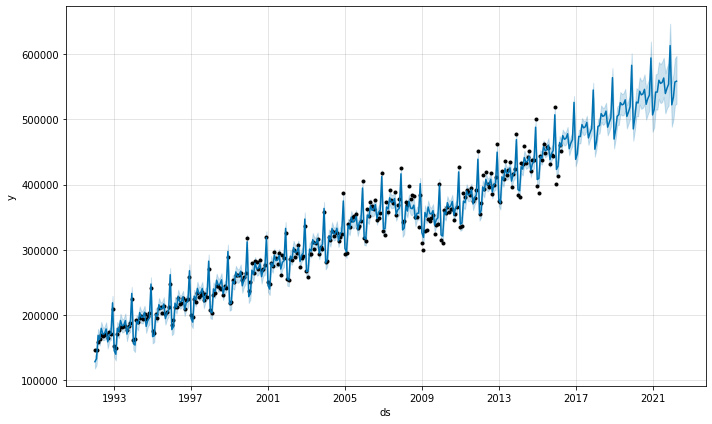

In [21]:
fig1 = model_fit.plot(forecast)

In [12]:
X = retail_rl.values
size = int(len(X) * 0.9)
train_rl, test_rl = retail_rl[0:size], retail_rl[size:len(X)]
l1=len(train_rl)
l2=len(test_rl)
history_rl=train_rl
predictions_rl = list()
print('l1: ',l1,'l2: ',l2)

l1:  262 l2:  30


In [13]:
for t in range(len(test_rl)):
    model_rl = Prophet()
    model_fit_rl = model_rl.fit(history_rl)
    future_rl = model_fit_rl.make_future_dataframe(periods=1, freq='M')
    future_rl = future_rl.iloc[[len(history_rl)]]
    forecast_rl = model_fit_rl.predict(future_rl)
    yhat_rl = forecast_rl[['yhat']]
    predictions_rl.append(yhat_rl.iloc[0,0])
    obs_rl = test_rl.iloc[[t]]
    history_rl=history_rl.append(obs_rl)
    print("nueva longitud:",len(history_rl))
    #print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 263


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 264


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 265


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 266


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 267


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 268


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 269


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 270


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 271


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 272


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 273


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 274


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 275


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 276


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 277


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 278


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 279


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 281


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 282


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 283


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 284


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 285


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 286


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 287


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 288


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 289


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 290


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 291
nueva longitud: 292


In [14]:
error_rl = mean_squared_error(test_rl.loc[:,'y'].to_list(), predictions_rl)**0.5
error_rl

0.028356949921363363

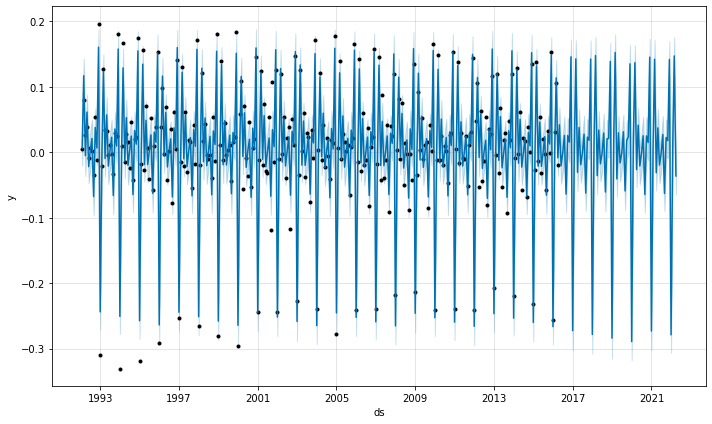

In [18]:
future_rl = model_fit_rl.make_future_dataframe(periods=12* 6, freq='M')
#future.tail()
forecast_rl = model_fit_rl.predict(future_rl)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1_rl = model_fit_rl.plot(forecast_rl)